## Import Libraries

In [1]:
import os
import sys
import argparse
from pydub import AudioSegment
import librosa
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import pandas as pd
import numpy as np

from live_audio import *

%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




## Convert All Audio to .wav

In [2]:
def convert_to_m4a():
    # Converts all audio to m4a format
    folder = '../../data/live_audio/'
    for filename in os.listdir(folder):
        in_filename = os.path.join(folder, filename)
        if not os.path.isfile(in_filename):
            continue
        oldbase = os.path.splittext(filename)
        name = in_filename.replace('.tmp', '.m4a')
        output = os.rename(in_filename, name)



def convert_to_wav():
    formats_to_convert = ['.m4a']

    for (dirpath, dirnames, filenames) in os.walk("../../data/live_audio"):
        for filename in filenames:
            if filename.endswith(tuple(formats_to_convert)):

                filepath = dirpath + '/' + filename
                (path, file_extension) = os.path.splitext(filepath)
                file_extension_final = file_extension.replace('.', '')
                try:
                    track = AudioSegment.from_file(filepath,
                            file_extension_final)
                    wav_filename = filename.replace(file_extension_final, 'wav')
                    wav_path = dirpath + '/' + wav_filename
                    print('CONVERTING: ' + str(filepath) + '...')
                    file_handle = track.export(wav_path, format='wav')
                    os.remove(filepath)
                except:
                    print("ERROR CONVERTING " + str(filepath))
#     print('CONVERTING DONE.')

In [3]:
convert_to_wav()

In [5]:
LIVE_AUDIO = '../../data/live_audio/'

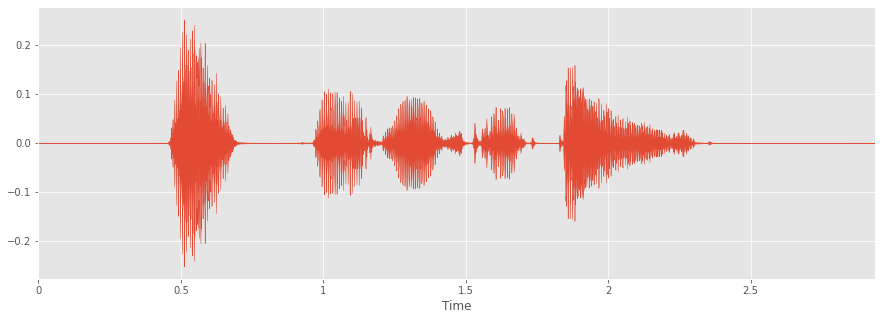

In [6]:
fname = LIVE_AUDIO + 'blah.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [7]:
fname

'../../data/live_audio/blah.wav'

In [8]:
mfcc_live(fname)

,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mfcc40,mfcc41,mfcc42,mfcc43,mfcc44,mfcc45,mfcc46,mfcc47,mfcc48,mfcc49
0,-517.293457,120.937134,-29.529301,48.511436,11.006127,-27.758667,-9.98581,-21.992613,-7.445376,-2.387701,...,-3.333122,-3.19483,-0.28801,-0.677887,-1.795266,-3.227842,-4.567207,-1.229681,-0.608068,0.465474


In [9]:
from live_audio import predict_live

In [10]:
predict_live(fname)

1/1 [==============================] - 1s 1s/step


,predicted
0,0
